In [ ]:
import tensorflow as tf
print(tf.__version__)

# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [5]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
# Save the input and target variables

#print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [11]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis =0))/targets.std()


In [12]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets,test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_data.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397, 10)
(45,)


#### Train a feedforward neural network model

In [38]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
         Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model
model = get_model()

In [39]:
# Print the model summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               1408      
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 1)                

In [40]:
# Compile the model
model.compile(optimizer="adam",loss="mse",metrics=["mae"])


In [41]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15,batch_size = 64,verbose= False
                    )


2022-05-24 20:02:16.375180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-24 20:02:16.731651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [42]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets,verbose= 2)


2/2 - 0s - loss: 0.6810 - mae: 0.6282 - 61ms/epoch - 31ms/step


[0.6810418367385864, 0.6282005310058594]

#### Plot the learning curves

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

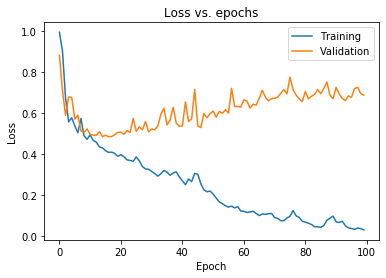

In [44]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [50]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [55]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation="relu"),
        Dense(1)
    ])
    return model

In [56]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5,0.3)

In [57]:
# Compile the model
model.compile(optimizer="adam",loss="mse",metrics=["mae"])


In [58]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100,
                   validation_split= 0.15,batch_size=64,verbose=False)


2022-05-24 20:04:03.164800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-24 20:04:04.325480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [59]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets, verbose=2)


2/2 - 0s - loss: 0.4225 - mae: 0.4952 - 64ms/epoch - 32ms/step


[0.42246824502944946, 0.4952378273010254]

#### Plot the learning curves

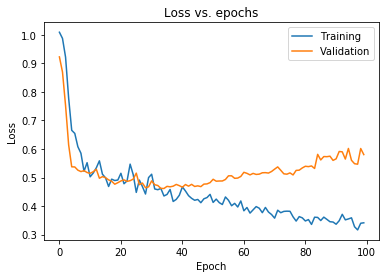

In [60]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [74]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self,epoch, logs=None):
        print(f"Starting epoch (epoch)")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finnished batch {batch}")
    
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finnished epoch {epoch}")
    
    def on_train_end(self, logs=None):
        print("Finished training!")
        
class TestCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
  
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finnished batch {batch}")
    
    def on_test_end(self, logs=None):
        print("Finished testing!")

class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
  
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finnished batch {batch}")
    
    def on_predict_end(self, logs=None):
        print("Finished Prediction!")

In [75]:
# Re-build the model

model =get_regularised_model(1e-5,0.3)

In [76]:
# Compile the model

model.compile(optimizer="adam", loss="mse")

#### Train the model with the callback

In [77]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets,epochs=3, batch_size=128,verbose=False,callbacks =[TrainingCallback()])

Starting training...
Starting epoch (epoch)
Training: Starting batch 0


2022-05-25 14:53:27.450224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Training: Finnished batch 0
Training: Starting batch 1
Training: Finnished batch 1
Training: Starting batch 2
Training: Finnished batch 2
Training: Starting batch 3
Training: Finnished batch 3
Finnished epoch 0
Starting epoch (epoch)
Training: Starting batch 0
Training: Finnished batch 0
Training: Starting batch 1
Training: Finnished batch 1
Training: Starting batch 2
Training: Finnished batch 2
Training: Starting batch 3
Training: Finnished batch 3
Finnished epoch 1
Starting epoch (epoch)
Training: Starting batch 0
Training: Finnished batch 0
Training: Starting batch 1
Training: Finnished batch 1
Training: Starting batch 2
Training: Finnished batch 2
Training: Starting batch 3
Training: Finnished batch 3
Finnished epoch 2
Finished training!


In [78]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False,callbacks= [TestCallback()])

Starting testing...
Testing: Starting batch 0
Testing: Finnished batch 0
Testing: Starting batch 1
Testing: Finnished batch 1
Finished testing!


2022-05-25 14:53:31.168094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.9383060336112976

In [80]:
# Make predictions with the model

model.predict(test_data, verbose =False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0


2022-05-25 14:53:43.804837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Prediction: Finnished batch 0
Prediction: Starting batch 1
Prediction: Finnished batch 1
Finished Prediction!


array([[ 0.19541645],
       [ 0.16452566],
       [ 0.08715614],
       [ 0.04422875],
       [ 0.04537284],
       [ 0.0069511 ],
       [ 0.09997138],
       [-0.01829487],
       [ 0.12573658],
       [ 0.14480898],
       [-0.00743088],
       [ 0.0024099 ],
       [ 0.19520986],
       [ 0.00722328],
       [ 0.09197798],
       [-0.02580591],
       [-0.02538347],
       [ 0.03208879],
       [ 0.07741279],
       [-0.01836847],
       [-0.0153835 ],
       [ 0.12042184],
       [ 0.18297213],
       [ 0.039838  ],
       [ 0.15499043],
       [ 0.1671257 ],
       [ 0.17956945],
       [ 0.08410949],
       [-0.022365  ],
       [ 0.00682654],
       [-0.02527295],
       [-0.01794569],
       [ 0.1327006 ],
       [-0.02211451],
       [ 0.04594091],
       [ 0.00605671],
       [ 0.1376372 ],
       [ 0.0896548 ],
       [-0.02861792],
       [ 0.06003509],
       [-0.02003496],
       [ 0.09179837],
       [-0.01796937],
       [-0.01390816],
       [ 0.0085016 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()